In [21]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -5.25
df = 29  # Replace this with your specific degrees of freedom
#CDF --> Curve Distribution Function
# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value*2)


1.2661543276458181e-05


#One Sample Test

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from google.colab import files
upload=files.upload()
train = pd.read_csv('train.csv').drop(columns='Survived')
upload=files.upload()
test = pd.read_csv('test.csv')

train.head()
test.head()

Saving train.csv to train (1).csv


Saving test.csv to test.csv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
final_df = pd.concat([train,test]).sample(1309)

In [13]:
pop = final_df['Age'].dropna()

In [14]:
sample_age = pop.sample(25).values

In [15]:
#H0 --> The mean is 35
#H1 --> The mean is less then 35

In [18]:
#Check for normality using Shapiro Wilk Test
from scipy.stats import shapiro

shapiro_age = shapiro(sample_age)

print(shapiro_age)

ShapiroResult(statistic=0.9558966755867004, pvalue=0.33882197737693787)


In [16]:
pop_mean = 35

In [17]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_1samp(sample_age,pop_mean)

print('t_statistic:',t_statistic)
print('p_value:',p_value/2) #one tail test
#p_value < 0.05 so may reject H0

t_statistic: -3.1855218816568427
p_value: 0.001988802053951938


#Two Sample Test / Independent Sample Test

In [22]:
#The Shapiro Wilk Test returns two value : the test statistics (W) and p_value
#If the p-value is greater than your chosen significance level ( α = 0.05) --> 5%
#you can assume the data comes from a normally distributed population.
#If p-value <  α = 0.05, than data are not noramlly distributed
#and u should consider applying a data transformation of using a non-parameteric test like the Mann-Whitney U test.

from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print("Shapiro-Wilk test for desktop users:", shapiro_desktop)
print("Shapiro-Wilk test for mobile users:", shapiro_mobile)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9783114194869995, pvalue=0.7790969014167786)
Shapiro-Wilk test for mobile users: ShapiroResult(statistic=0.9714356064796448, pvalue=0.5791608691215515)


In [23]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met,
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

from scipy.stats import levene

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform Levene's test
levene_test = levene(desktop_users, mobile_users)
print(levene_test)


LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741761)


In [24]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -5.25
df = 58  # Replace this with your specific degrees of freedom
#CDF --> Curve Distribution Function
# Calculate the CDF value
cdf_value = t.cdf(t_value, df)
print(cdf_value*2)


2.256369746933224e-06


In [25]:
# cdf_value < ( α = 0.05), So reject the H0

#Paired  2 Sample Test --> Dependent

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])


In [27]:
differences = after - before

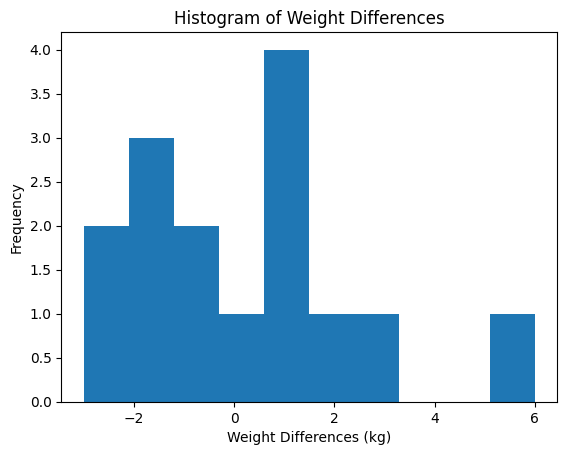

Shapiro-Wilk test: ShapiroResult(statistic=0.9220570921897888, pvalue=0.20704729855060577)


In [28]:
plt.hist(differences)
plt.title("Histogram of Weight Differences")
plt.xlabel("Weight Differences (kg)")
plt.ylabel("Frequency")
plt.show()

shapiro_test = stats.shapiro(differences)
print("Shapiro-Wilk test:", shapiro_test)


In [29]:
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

In [30]:
mean_diff

0.06666666666666667

In [31]:
std_diff

2.4630604269214893

In [32]:
n = len(differences)
t_statistic = mean_diff / (std_diff / np.sqrt(n))
df = n - 1

In [33]:
t_statistic


0.10482848367219182

In [34]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic, df)

In [35]:
p_value


0.5410005146857456

In [36]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.
